In [276]:
# Import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Classifier libraries -ML algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [124]:
# Load dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\10alytics\Capstone Project\diabetes_prediction_dataset.csv")
print(data.shape)
data.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [105]:
# Data verification -  Data type, number of features and rows, missing data. etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [106]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


##### There are variations between the mean and the median, this means there are outliers in the data set. 
##### Further exploratory data analysis will confirm the above.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


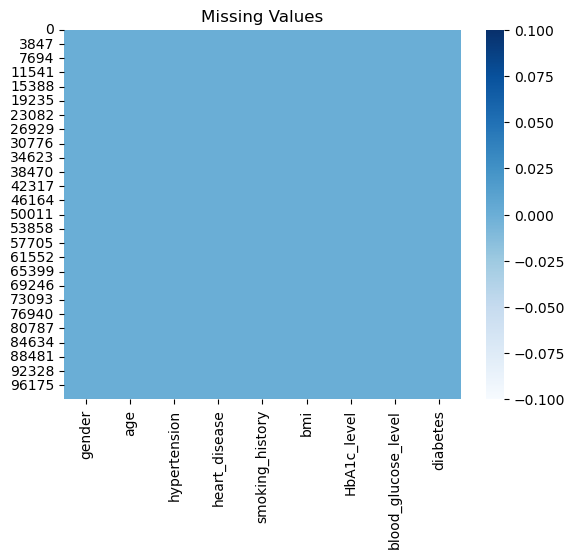

In [280]:
# Check for missing values
print(data.isnull().sum())

# Visualising missing data
sns.heatmap(data.isnull(), cmap="Blues")
plt.title("Missing Values");

###### This shows that there are no missing values in the data set.

In [16]:
data.select_dtypes(include="object").columns.to_list()

['gender', 'smoking_history']

In [17]:
data.select_dtypes(include="number").columns.to_list()

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

### Exploratory Data Analysis

#### Univariate analysis

label
No     91500
Yes     8500
Name: count, dtype: int64


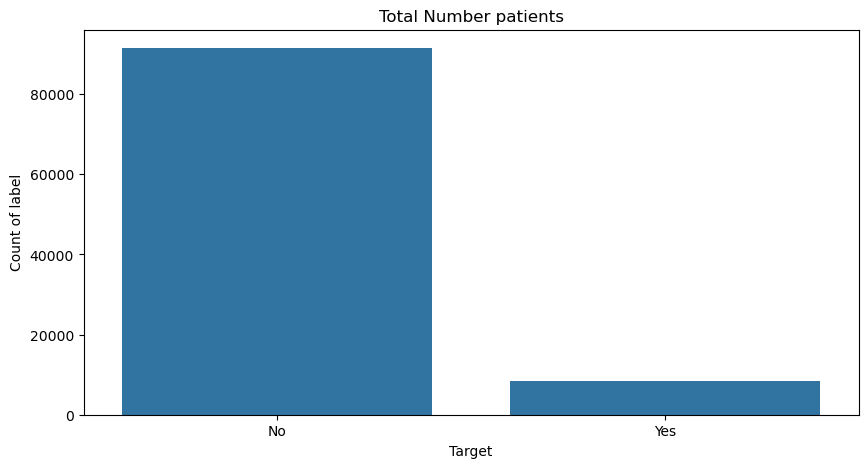

In [125]:
# Categorical columns
# Data visualization
# target - have diabetes or not (1: Yes, 0:no)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    

data["label"] = data["diabetes"].apply(label)
print(data["label"].value_counts())

# investigating the type of chest pain of patients
plt.figure(figsize=(10,5))
sns.countplot(x=data["label"])
plt.xlabel("Target")
plt.ylabel("Count of label")
plt.title("Total Number patients");

age_bracket
Youth(<=35)        39988
Adult(<=55)        27750
Elderly(>65)       17434
Old Adult(<=65)    14828
Name: count, dtype: int64


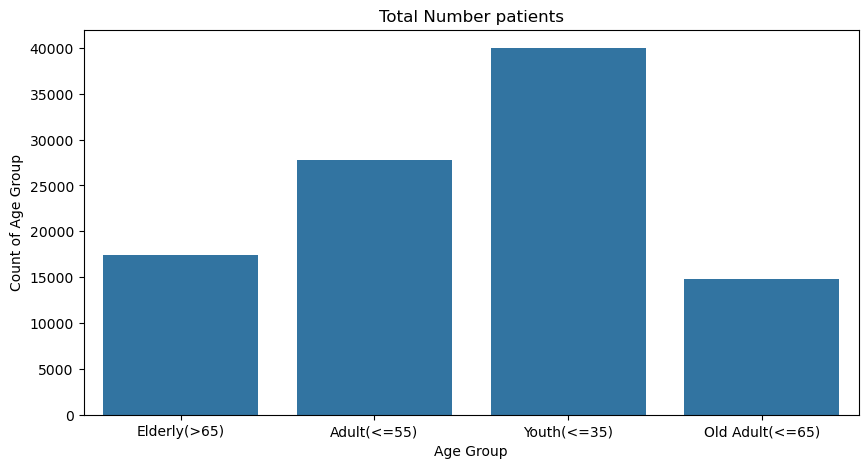

In [126]:
# Data visualization
#Age bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

data["age_bracket"] = data["age"].apply(age_bracket)
print(data["age_bracket"].value_counts())

# investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x=data["age_bracket"])
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number patients");

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


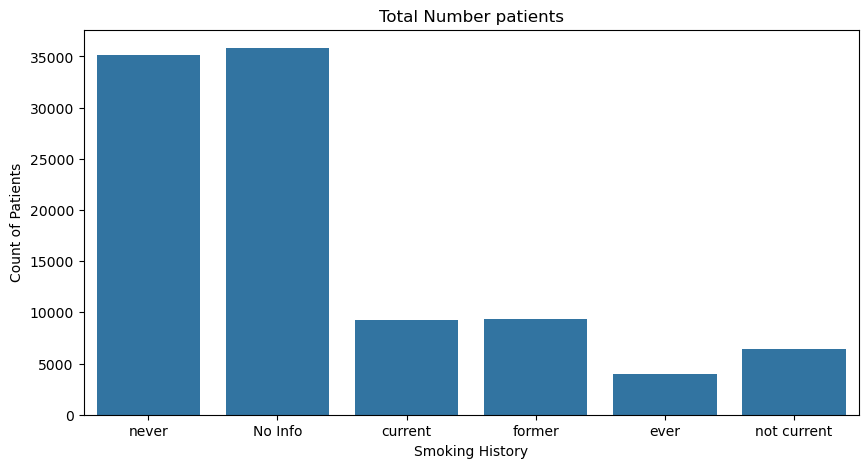

In [281]:
# Data Visualisation
# investigating the smoking hisotry of patients
print(data["smoking_history"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=data["smoking_history"])
plt.xlabel("Smoking History")
plt.ylabel("Count of Patients")
plt.title("Total Number patients");

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


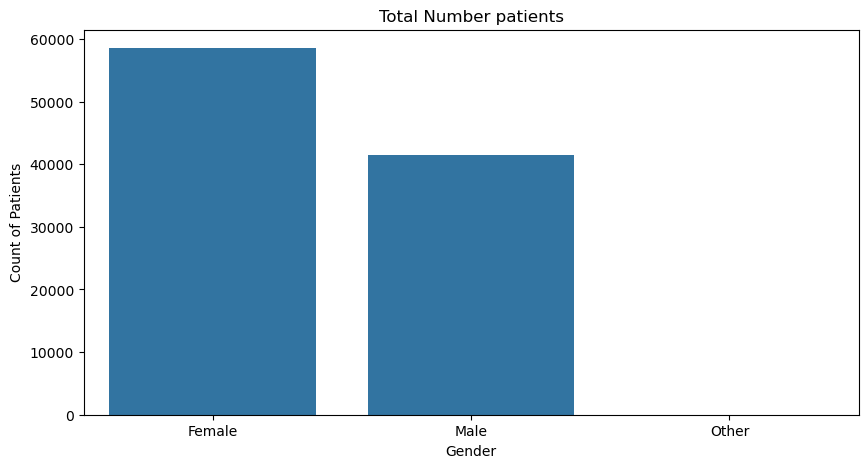

In [30]:
# Data Visualisation
# investigating the gender of patients
print(data["gender"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=data["gender"])
plt.xlabel("Gender")
plt.ylabel("Count of Patients")
plt.title("Total Number patients");

hyp_cat
No     92515
Yes     7485
Name: count, dtype: int64


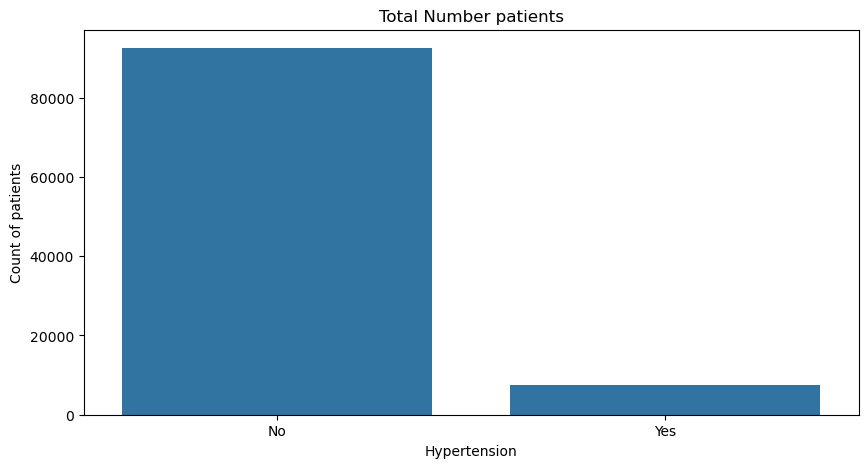

In [128]:
# Data visualization
# Hypetension - have hypertension or not (1: Yes, 0:no)
def hyper(hyp):
    if hyp == 1:
        return "Yes"
    else:
        return "No"
    

data["hyp_cat"] = data["hypertension"].apply(hyper)
print(data["hyp_cat"].value_counts())

# investigating the type of chest pain of patients
plt.figure(figsize=(10,5))
sns.countplot(x=data["hyp_cat"])
plt.xlabel("Hypertension")
plt.ylabel("Count of patients")
plt.title("Total Number patients");

heart_dis_cat
No     96058
Yes     3942
Name: count, dtype: int64


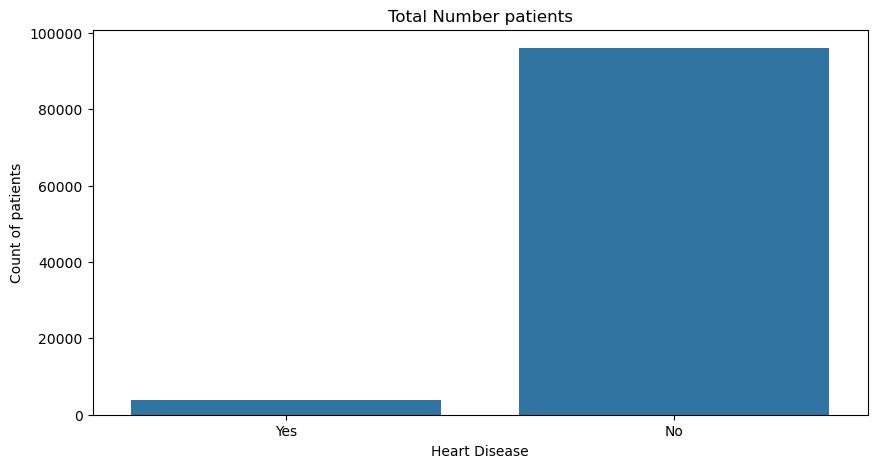

In [129]:
# Data visualization
# Heart disease - have heart disease or not (1: Yes, 0:no)
def heart_dis(ht):
    if ht == 1:
        return "Yes"
    else:
        return "No"
    

data["heart_dis_cat"] = data["heart_disease"].apply(heart_dis)
print(data["heart_dis_cat"].value_counts())

# investigating the type of chest pain of patients
plt.figure(figsize=(10,5))
sns.countplot(x=data["heart_dis_cat"])
plt.xlabel("Heart Disease")
plt.ylabel("Count of patients")
plt.title("Total Number patients");

In [112]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,label,age_bracket,hyp_cat,heart_dis_cat
0,Female,80.0,0,1,never,25.19,6.6,140,0,No,Elderly(>65),No,Yes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No,Adult(<=55),No,No
2,Male,28.0,0,0,never,27.32,5.7,158,0,No,Youth(<=35),No,No


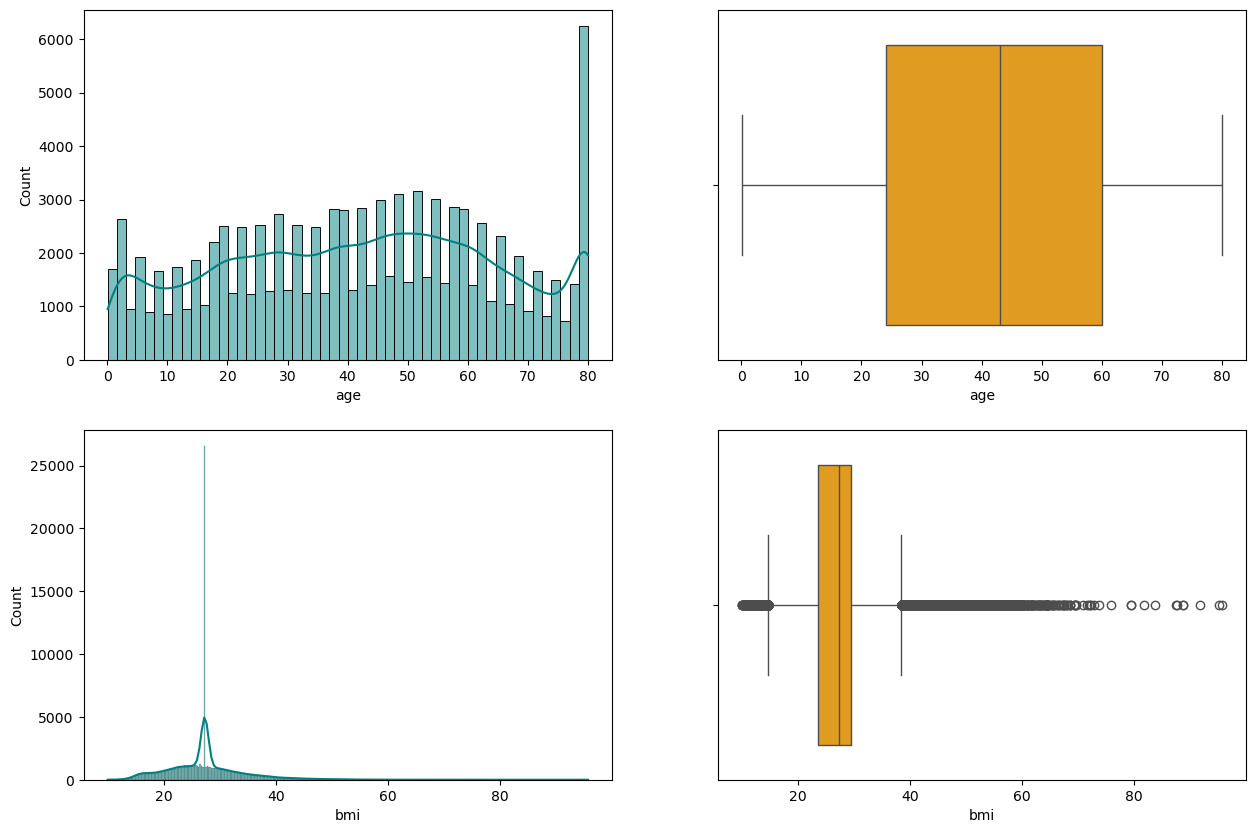

In [50]:
# numerical analysis
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.histplot(data['age'], color='teal', kde=True, ax=axs[0,0])
sns.boxplot(x=data["age"], color="orange", ax=axs[0,1])

sns.histplot(data['bmi'], color='teal', kde=True, ax=axs[1,0])
sns.boxplot(x=data["bmi"], color="orange", ax=axs[1,1]);

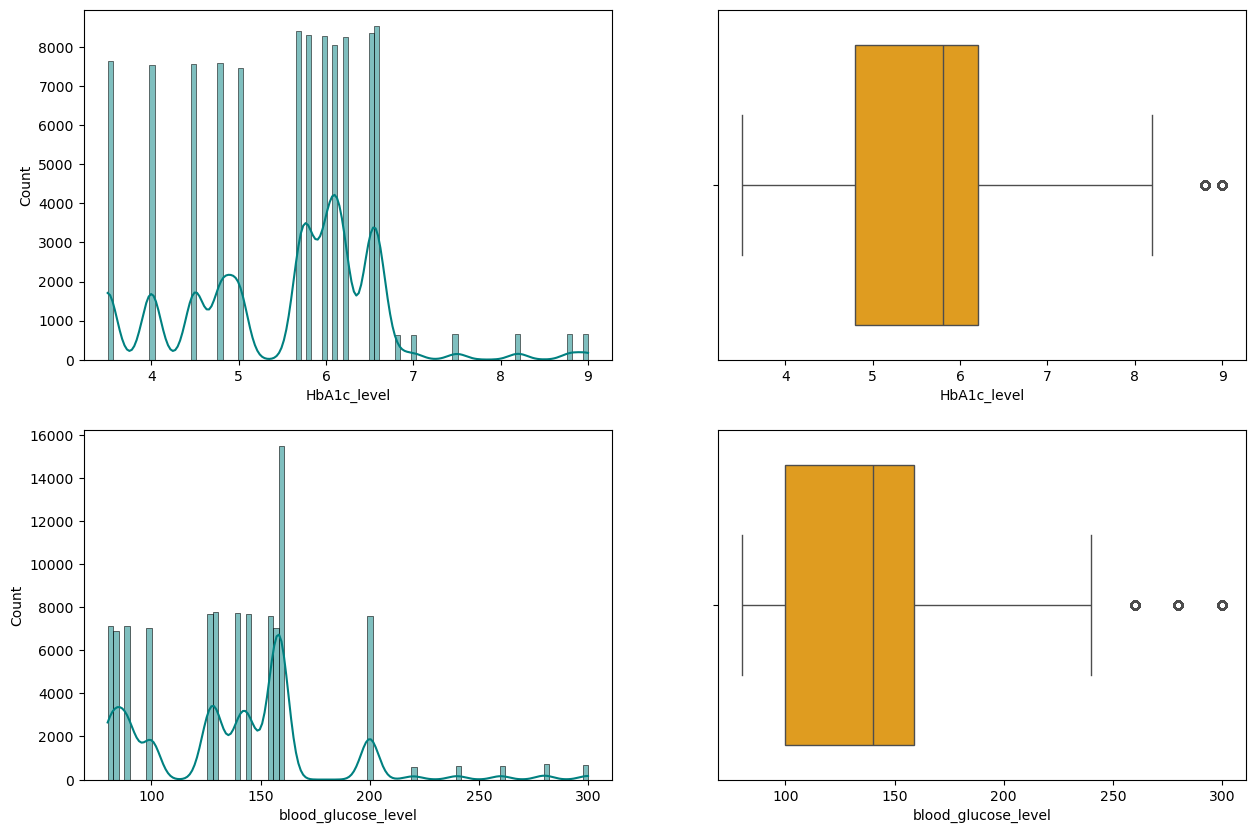

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.histplot(data['HbA1c_level'], color='teal', kde=True, ax=axs[0,0])
sns.boxplot(x=data["HbA1c_level"], color="orange", ax=axs[0,1])

sns.histplot(data['blood_glucose_level'], color='teal', kde=True, ax=axs[1,0])
sns.boxplot(x=data["blood_glucose_level"], color="orange", ax=axs[1,1]);

##### The histplot and boxplot visualisations further confirms outliers in the data set.

#### Bivariate analysis

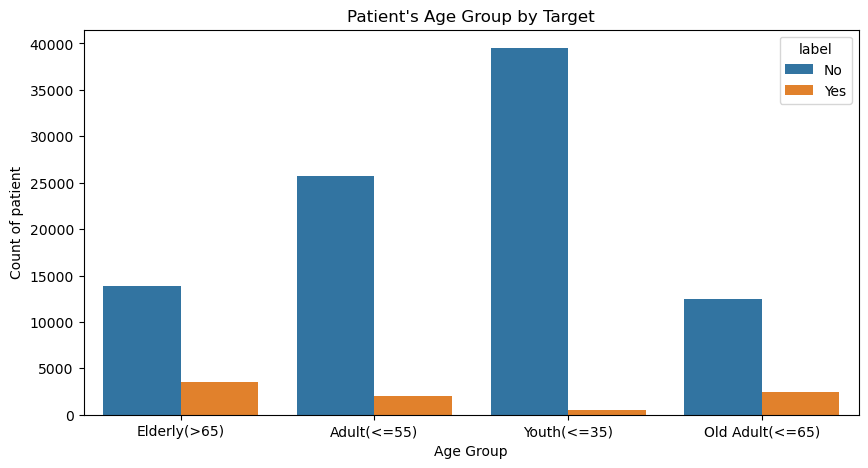

In [61]:
# Investigate the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=data, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of patient")
plt.title("Patient's Age Group by Target");

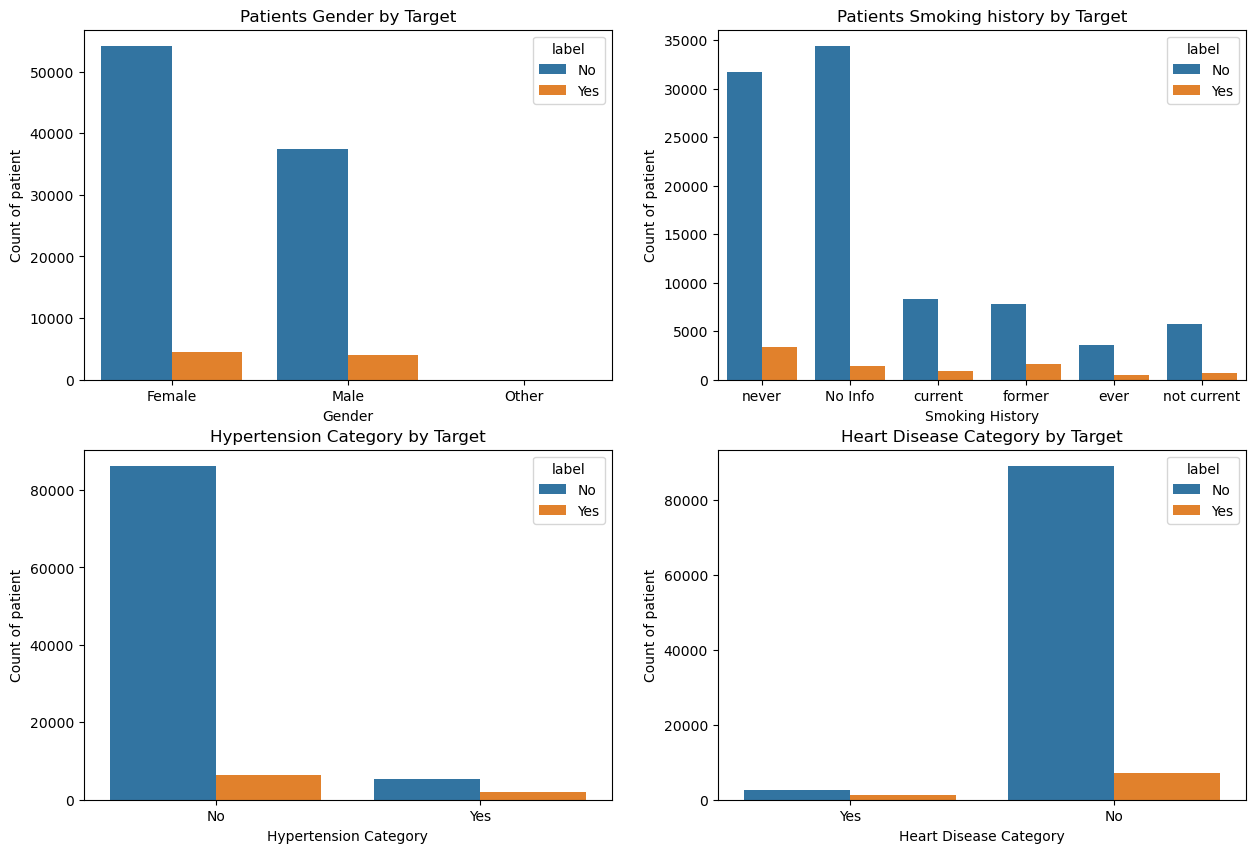

In [65]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.countplot(x="gender", data=data, hue="label", ax=axs[0,0])
axs[0,0].set_title('Patients Gender by Target')
axs[0,0].set_xlabel("Gender")
axs[0,0].set_ylabel("Count of patient")

sns.countplot(x="smoking_history", data=data, hue="label", ax=axs[0,1])
axs[0,1].set_title('Patients Smoking history by Target')
axs[0,1].set_xlabel("Smoking History")
axs[0,1].set_ylabel("Count of patient")

sns.countplot(x="hyp_cat", data=data, hue="label", ax=axs[1,0])
axs[1,0].set_title('Hypertension Category by Target')
axs[1,0].set_xlabel("Hypertension Category")
axs[1,0].set_ylabel("Count of patient")

sns.countplot(x="heart_dis_cat", data=data, hue="label", ax=axs[1,1])
axs[1,1].set_title('Heart Disease Category by Target')
axs[1,1].set_xlabel("Heart Disease Category")
axs[1,1].set_ylabel("Count of patient");

#### Multivariate Analysis

In [93]:
# normalising gender for correlation
#Sex
#def sex(gender):
    #if gender == "Male":
     #   return 1
    #else:
     #   return 0

#data["sex"] = data["gender"].apply(sex)
#data[["sex"]].head(1)
data.drop("sex", axis=1, inplace =True)

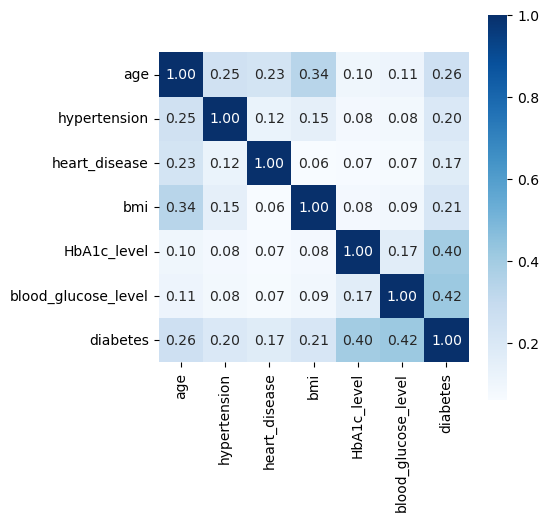

In [287]:
# Correlation between target and other variables in the dataset
corr_data = data.select_dtypes(include="number")

plt.figure(figsize=(8,8))
hm =  sns.heatmap(corr_data.corr(), cbar=True, cmap="Blues", annot=True, square=True, fmt='.2f',
                  annot_kws={'size':10})           

#### Data Preprocessing


In [272]:
# feature engineering
print(f"The dataset contain {len(data)} records before spliting")

The dataset contain 100000 records before spliting


In [ ]:
data.drop(["label", "age_bracket", "hyp_cat", "heart_dis_cat"], axis=1, inplace=True)

In [132]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [140]:
# extracting label 
label = data[["diabetes"]]
label.head(2)

,diabetes
0,0
1,0


In [143]:
features = data.drop("diabetes", axis=1)
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80


In [146]:
# inititalizing label encoder
encoder = LabelEncoder()

In [137]:
cat_columns = data.select_dtypes(include="object").columns.to_list()
cat_columns

['gender', 'smoking_history']

In [148]:
# fit and transfrom the categorical columns
for column_name in cat_columns:
    features[column_name] = encoder.fit_transform(features[column_name])

features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [152]:
# Dealing with Outliers -  'bmi', 'HbA1c_level', 'blood_glucose_level'
#Normalize the data
scaler = MinMaxScaler()

features["Scaled_bmi"] = scaler.fit_transform(features["bmi"].values.reshape(-1,1))
features["Scaled_HbL"] = scaler.fit_transform(features["HbA1c_level"].values.reshape(-1,1))
features["Scaled_Bgl"] = scaler.fit_transform(features["blood_glucose_level"].values.reshape(-1,1))

features.drop(['bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1, inplace=True)
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,Scaled_bmi,Scaled_HbL,Scaled_Bgl
0,0,80.0,0,1,4,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0.202031,0.563636,0.000000


#### Machine Learning

In [153]:
# Split data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [273]:
len(X_train)==len(y_train)

True

In [274]:
len(X_test)==len(y_test)

True

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.958
Precision: 0.8598673300165838
Recall: 0.6071428571428571
F1-score: 0.7117364447494853
AUC-ROC: 0.7989519227765456


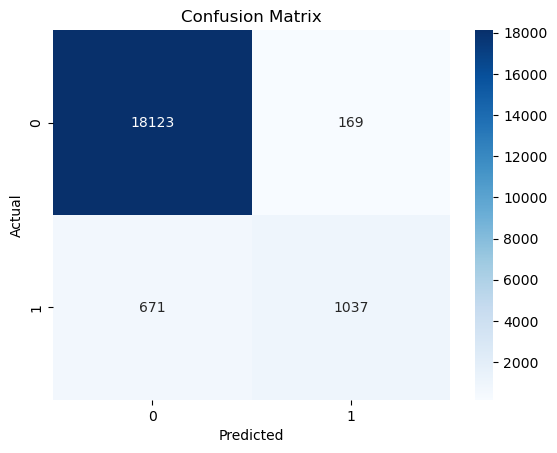

In [163]:
# Model Building

# Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest
Accuracy: 0.97065
Precision: 0.951651893634166
Recall: 0.6914519906323185
F1-score: 0.800949474398101
AUC-ROC: 0.8440859340872068


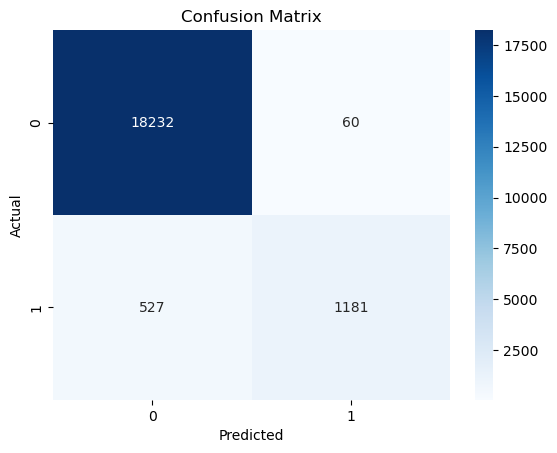

In [164]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes
Accuracy: 0.90475
Precision: 0.4585612116112747
Recall: 0.6381733021077284
F1-score: 0.5336597307221542
AUC-ROC: 0.783907337692832


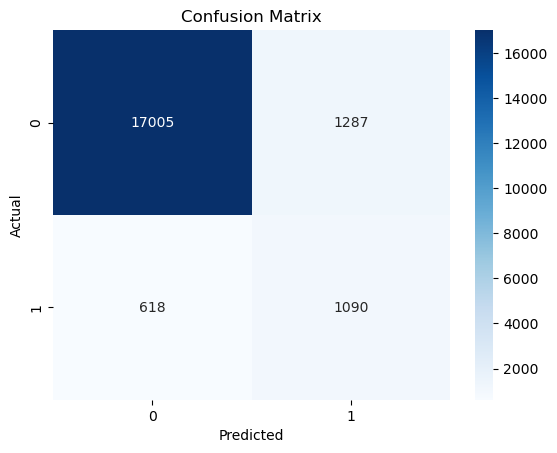

In [170]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

XGB Classifier
Accuracy: 0.9709
Precision: 0.952572347266881
Recall: 0.6937939110070258
F1-score: 0.8028455284552846
AUC-ROC: 0.8452842286283762


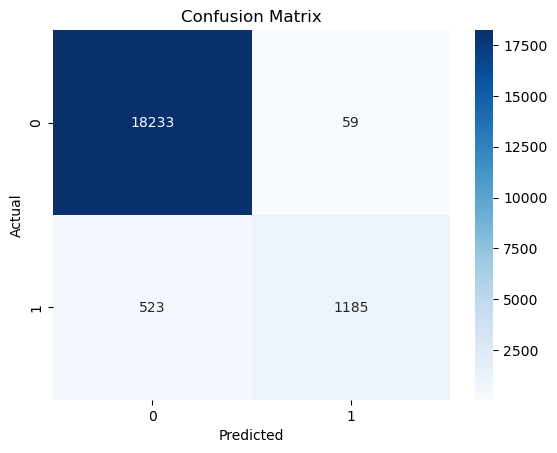

In [171]:
# XGB Classifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGB Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision tree
Accuracy: 0.9522
Precision: 0.7124293785310735
Recall: 0.7382903981264637
F1-score: 0.7251293847038528
AUC-ROC: 0.8552320129709511


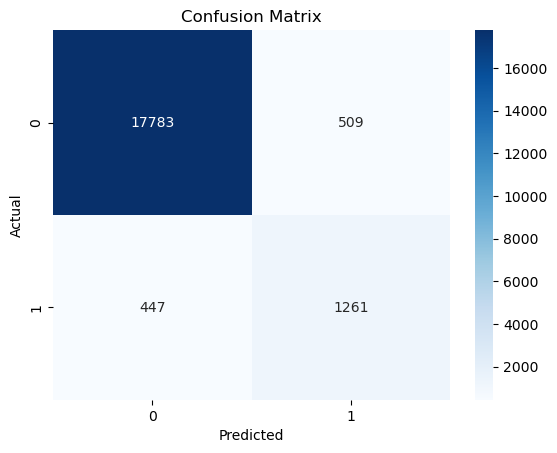

In [174]:
# Decision tree
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGD Classifier
Accuracy: 0.95045
Precision: 0.7302504816955684
Recall: 0.6656908665105387
F1-score: 0.6964777947932619
AUC-ROC: 0.8213650046526014


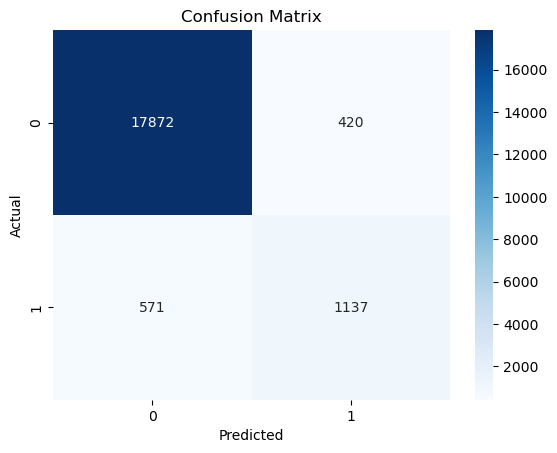

In [178]:
# SGD Classifier
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SGD Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [180]:
# Applying multiple Machine Learning Algoritnms to the dataset
# 6 ML algorithms will be applied
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'], 
               [SGDClassifier(), 'SGD Classifier'], 
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [212]:
acc_list = {}
precision_list = {}
recall_list = {}
#f1_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    y_pred = model.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    prec_score = precision_score(y_test, y_pred)
    recc_score = recall_score(y_test, y_pred)
    #f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    
    acc_list[model_name] = ([round(acc_score*100, 2)])
    precision_list[model_name] = ([round(prec_score*100, 2)])
    recall_list[model_name] = ([round(recc_score*100, 2)])
    #f1_list[model_name] = ([str(round(F1_score*100, 2)) + "%"])
    roc_list[model_name] = ([round(roc_score*100, 2)])

    if model_name != classifiers[-1][-1]:
        print("")

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
print("Accuracy", acc_list)
print("Precision", precision_list)
print("Recall", recall_list)
print("AUC-ROC", roc_list)

Accuracy {'XGB Classifier': [97.09], 'Random Forest': [97.02], 'SGD Classifier': [95.23], 'Naive Bayes': [90.48], 'Decision tree': [95.22], 'Logistic Regression': [95.8]}
Precision {'XGB Classifier': [95.26], 'Random Forest': [94.7], 'SGD Classifier': [75.29], 'Naive Bayes': [45.86], 'Decision tree': [71.24], 'Logistic Regression': [85.99]}
Recall {'XGB Classifier': [69.38], 'Random Forest': [69.03], 'SGD Classifier': [65.63], 'Naive Bayes': [63.82], 'Decision tree': [73.83], 'Logistic Regression': [60.71]}
AUC-ROC {'XGB Classifier': [84.53], 'Random Forest': [84.33], 'SGD Classifier': [81.81], 'Naive Bayes': [78.39], 'Decision tree': [85.52], 'Logistic Regression': [79.9]}


In [233]:
# loading evaluation metrics into data frame for visualisation purpose
em1 = pd.DataFrame(acc_list).T # em= evaluation metric
em2 = pd.DataFrame(precision_list).T
em3 = pd.DataFrame(recall_list).T
em4 = pd.DataFrame(roc_list).T

In [235]:
# Assign column names
em1.columns = ["Accuracy"]
em2.columns = ["Precision"]
em3.columns = ["Recall"]
em4.columns = ["AUC-ROC"]

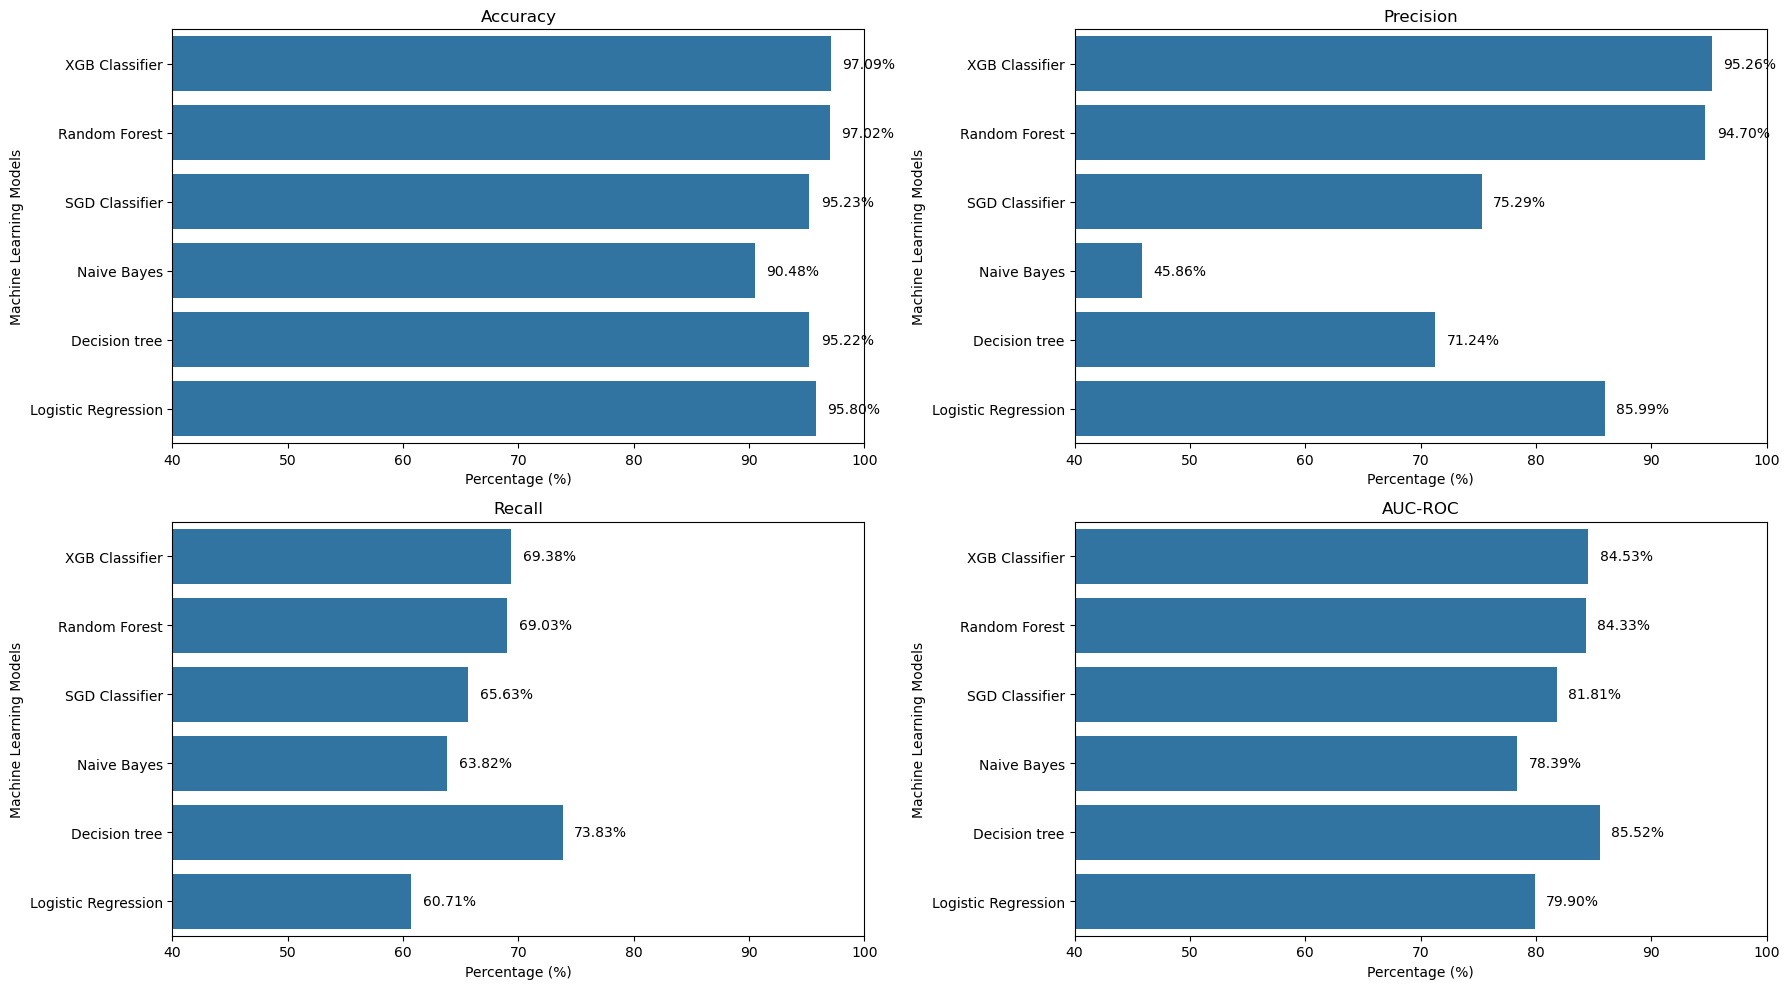

In [285]:
# Visualization
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
# Define metrics and corresponding axes
metrics = [('Accuracy', em1, axs[0, 0]),
           ('Precision', em2, axs[0, 1]),
           ('Recall', em3, axs[1, 0]), 
           ('AUC-ROC', em4, axs[1, 1])
          ]
# Iterate through metrics and plot each separately
for model, df, ax in metrics:

    # Convert data type to float
    df[model] = df[model].astype(float)
    
    sns.barplot(x= df[model], y= df.index, ax=ax) #palette='viridis', edgecolor='black')

    # Customize labels and title
    ax.set_title(model)
    ax.set_xlabel("Percentage (%)")
    ax.set_ylabel("Machine Learning Models")
    ax.set_xlim(40, 100)

    # Show values on bars
    #for index, value in enumerate(df.iloc[:, 0]):
       # ax.text(index, value + 0.5, f"{value:.2f}%", va='center')

    for index, value in enumerate(df.iloc[:, 0]):
        ax.text(value + 1, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()

##### using the recall score and auc-roc score is the best evaluation metrics in this case where false negatives can be fatal recall score and auc-roc score, the decision tree is the Machine learning model with the best performance followed by XGB Classifier and Random forest but it disadvantage is that it has hight false positives which makes it not cost effective.

#### Overall Performance of The ML Models
##### From the overall performance of the ML models, the best model taking into consideration the accuracy and precision is XGB Classifier with 97.09%. the top three models are XGB Classifier, Random Forest, and Decision three as shown in the charts above.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


ENSENBLE-Stacking Classifier
Accuracy: 0.97225
Precision: 0.958631662688942
Recall: 0.705503512880562
F1-score: 0.8128161888701517
AUC-ROC: 0.8513303700418554


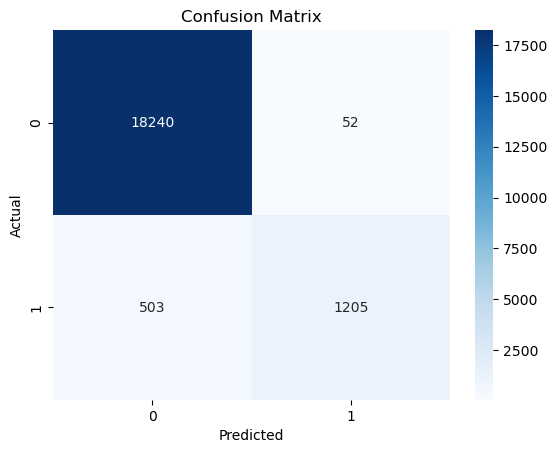

In [297]:
# using the esemble method to combine the strenght of models to balance precision and recall.
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('Decision tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('Random forest', RandomForestClassifier(max_depth=5, random_state=42)),
    ('XGB classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]

# Define meta-model (final decision maker)
meta_model = LogisticRegression()

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)

# Predict
y_pred = stacking_clf.predict(X_test)

print("ENSENBLE-Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()